# ANN regression for the price prediction

The link for the dataset: https://www.kaggle.com/datasets/harikrishnareddyb/used-car-price-predictions

Columns in the dataset:
Price - Target Variable.
Year - Year of the car purchased.
Mileage - The no.of kms drove by the car.
City - In which city it was sold.
State - In which state it was sold.
Vin - a unique number for a car.
Make - Manufacturer of the car.
Model - The model(name) of the car.

# Part 1. Introduction

In [45]:
# instalation of neccesary libraries

#!pip install numpy
#!pip install pandas
#!pip install seaborn
#!pip install scikit-learn
#!pip install tensorflow

In [46]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers

In [47]:
# upload data
df = pd.read_csv("true_car_listings.csv")

In [48]:
# see the amount of data
df.describe()

# this is not a small dataset
# we have 852 122 units
# which allows us to clean and balance data well

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [49]:
# we can see that we do have
# string data which we will need to convert to numeric
# to create a neural network later
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


# Part 2. Cleaning data and formating into numeric

1. Check duplicates
2. Check Nan values
3. Change the "City" column to numeric
4. Change the "State" column to numeric
5. Change the "Vin" column to numeric
6. Change the "Make" column to numeric
7. Change the "Model" column to numeric
8. Remove outliers by checking balance of these columns

In [50]:
# check data type to make a plan
df.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [51]:
# 1. Check duplicates
# check for duplicates
df.duplicated().sum()

# I have 30 which is a quite small number

30

In [52]:
# remove duplicates
df = df.drop_duplicates()

In [53]:
# 2. Check Nan values
# check for missing values
df.isna().sum()

# zero missing values

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [54]:
# check the number of unique values of each column
df.nunique()

Price       47124
Year           22
Mileage    158836
City         2553
State          59
Vin        852075
Make           58
Model        2736
dtype: int64

In [55]:
# I checked that I have a huge amount of unique values
# that is why I cannot use very popular and standard 
# methods like Label encoding or One-Hot encoding
# for transfering this data into numeric

# For some columns I opted for another 
# method which is Frequency encoding
# it encodes the values based on their frequency

# columns for this method
# City         2553
# State          59
# Make           58
# Model        2736

# 3. Change the "City" column to numeric
city_freq = df['City'].value_counts().to_dict()
df['City'] = df['City'].map(city_freq)

In [56]:
# check whether everything works correctly
# I can implement the same function to other columns
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,3058,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,1632,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,3058,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,425,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,478,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [57]:
# 4. Change the "State" column to numeric
state_freq = df['State'].value_counts().to_dict()
df['State'] = df['State'].map(state_freq)

In [58]:
# 6. Change the "Make" column to numeric
make_freq = df['Make'].value_counts().to_dict()
df['Make'] = df['Make'].map(make_freq)

In [59]:
# 7. Change the "Model" column to numeric
model_freq = df['Model'].value_counts().to_dict()
df['Model'] = df['Model'].map(model_freq)

In [60]:
# everything worked correctly
df.head()

# we have only one string column left

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,3058,94646,19VDE2E53EE000083,11049,19
1,10888,2013,19606,1632,27932,19VDE1F52DE012636,11049,660
2,8995,2013,48851,3058,94646,19VDE2E52DE000025,11049,19
3,10999,2014,39922,425,23002,19VDE1F71EE003817,11049,660
4,14799,2016,22142,478,10418,19UDE2F32GA001284,11049,187


In [61]:
# 5. Change the "Vin" column to numeric

# for the next "Vin" column
# I decided to go with Hashing encoding method
# because this column has a huge number of values
# Vin        852075

# import a library
import hashlib

# apply a hashing function to each Vin
df['Vin'] = df['Vin'].apply(lambda x: int(hashlib.sha256(x.encode('utf-8')).hexdigest(), 16) % 10**8)

In [62]:
# great, now we have only numeric data
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,3058,94646,80669382,11049,19
1,10888,2013,19606,1632,27932,96316523,11049,660
2,8995,2013,48851,3058,94646,14111535,11049,19
3,10999,2014,39922,425,23002,32923641,11049,660
4,14799,2016,22142,478,10418,61023132,11049,187


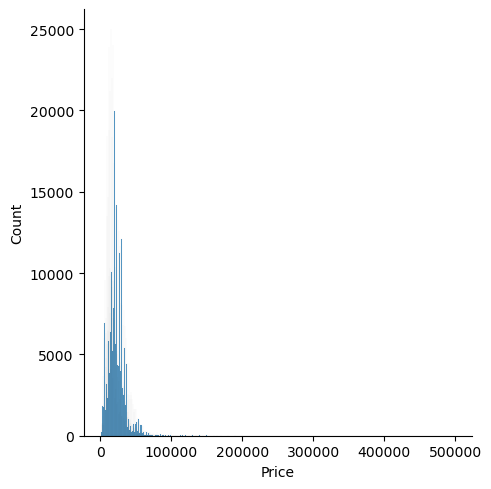

In [63]:
# 8. Remove outliers by checking balance of these columns
sns.displot(df, x="Price")

In [64]:
# let's remove everything that is considered as outliers

# df = df.query("Price > Price.quantile(0.05) and Price < Price.quantile(0.95)")
# this is still quite unbalanced

# df = df.query("Price > Price.quantile(0.05) and Price < Price.quantile(0.90)")
# this one is better but it still has more values on the right side

df = df.query("Price > Price.quantile(0.05) and Price < Price.quantile(0.85)")
# this variation shows better results and I will keep this one

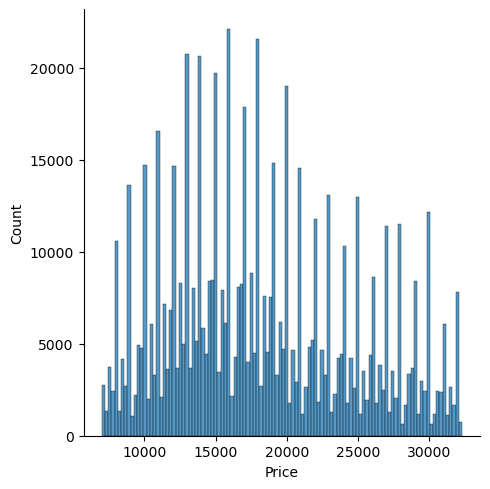

In [65]:
sns.displot(df, x="Price")

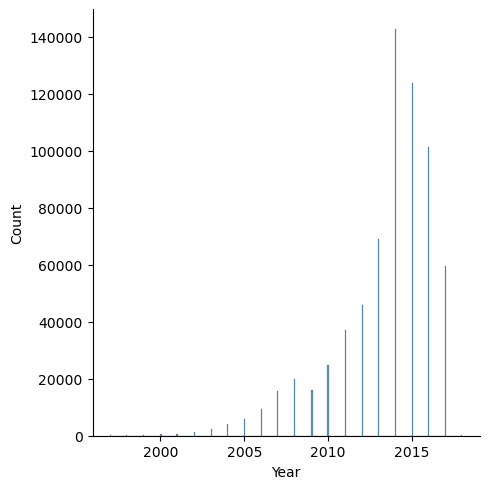

In [66]:
# check balance for the Year column
sns.displot(df, x="Year")

# we can see that the majority of outliers
# are on the left side that is why
# drop only some values from the "tail"

In [67]:
# let's see the number of unique values
unique_value_counts = df['Year'].value_counts()
print(unique_value_counts)

# if we have all values in thousands
# and only 135 for 2018, can we consider them as outliers?

2014    142624
2015    123916
2016    101483
2013     68940
2017     59554
2012     45988
2011     36966
2010     24906
2008     19857
2009     16073
2007     15704
2006      9493
2005      6043
2004      3982
2003      2246
2002      1279
2001       765
2000       551
1999       363
2018       220
1998       180
1997       131
Name: Year, dtype: int64


In [68]:
# let's see whether we have correlation between years
# it will help us to decide
# can we drop some years as outliers
# or we should keep them even though they look like outliers

# define the bins and corresponding labels
bins = [1990, 2000, 2010, 2015, 2020]  # define ´ bin edges
labels = ['1990-2000', '2000-2010', '2010-2015', '2015-2020']  # define ´ bin labels

# Aápply binning to the 'Year' column
df['Year_Binned'] = pd.cut(df['Year'], bins=bins, labels=labels, right=False)

# check the binning by counting the number of entries in each bin
bin_counts = df['Year_Binned'].value_counts()
print(bin_counts)

# insights:
# for sure we can drop years 1990
# before I thought about 2018 as an outliers
# values are in this year
# 2018       220
# 1998       180
# 1997       131

# but we can see that it is in a part of a big bin

2010-2015    319424
2015-2020    285173
2000-2010     75993
1990-2000       674
Name: Year_Binned, dtype: int64


In [69]:
# removing outliers
df = df.query("Year > Year.quantile(0.1)")

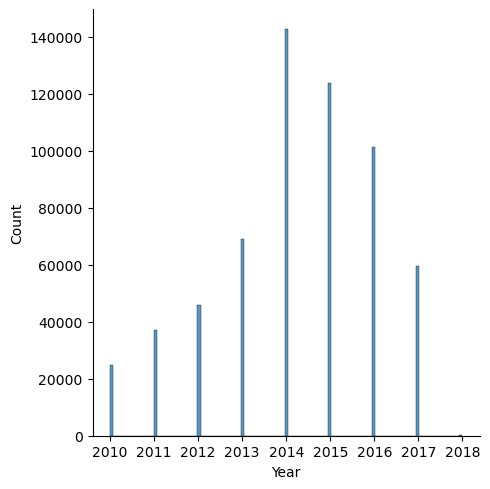

In [70]:
# quite balanced data
sns.displot(df, x="Year")

In [71]:
# drop the column that we created for this analysis
df = df.drop(columns='Year_Binned')

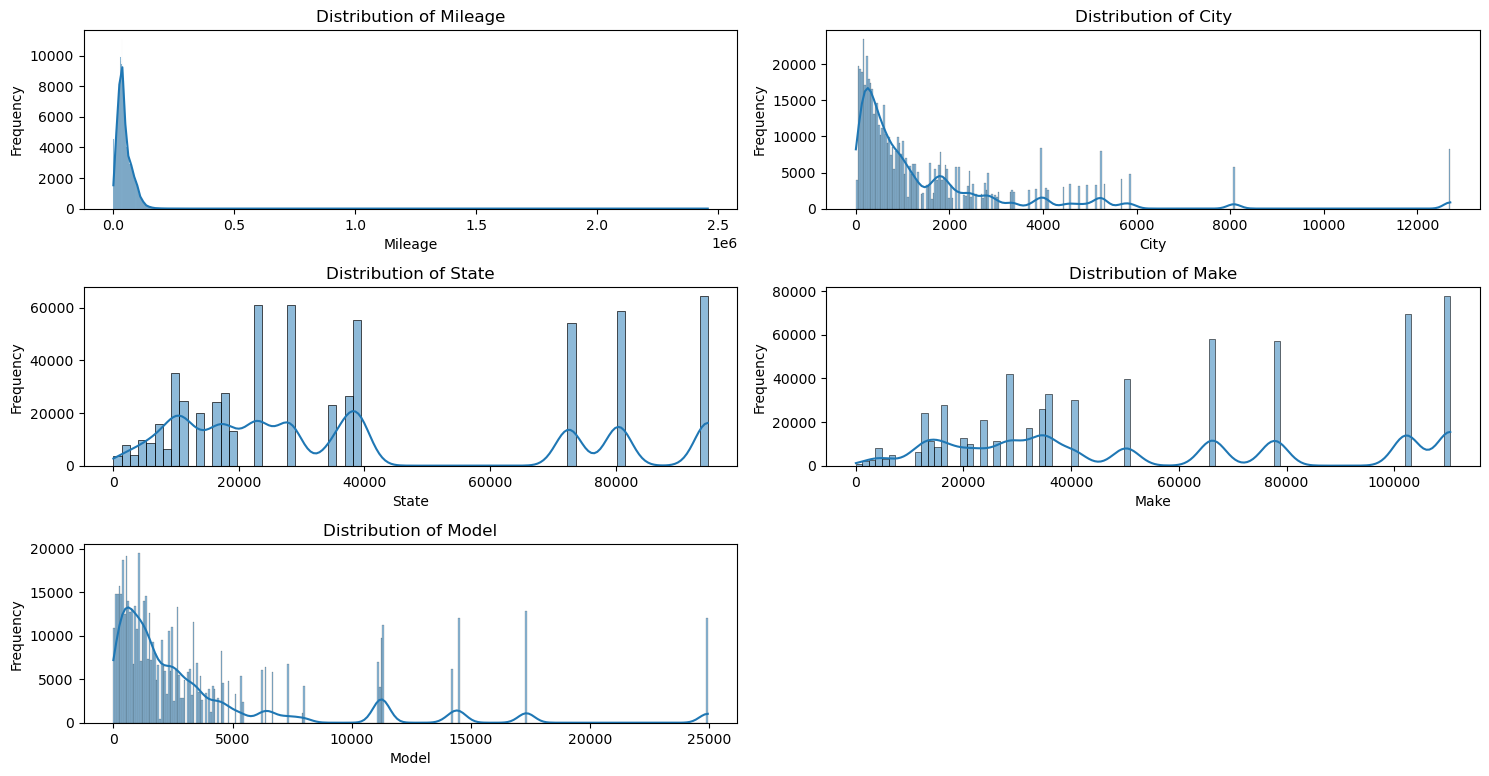

In [72]:
# I became tired of repeating the same code that is why
# i decided to make a graph that shows all balances at the same time
# ChatGPT helped me to generate this very quickly

# list of columns to plot
columns_to_plot = ['Mileage', 'City', 'State', 'Make', 'Model']

# Set up the plotting environment
plt.figure(figsize=(15, 10))

# Loop through the columns and create a displot for each
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)  # Adjust the subplot grid based on the number of columns
    sns.histplot(df[column], kde=True)  # kde=True adds a Kernel Density Estimate
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# insights:
# as we see all of these columns need to be balanced
# I deleted the VIN column from this because it is unique
# and only now I recognised that I actually do not need this column
# it does not affect predictions

In [73]:
# drop the VIN column
df = df.drop(columns='Vin')

In [74]:
# let's see the number of unique values
# for Mileage in order to see how many small
# but extreme values we have
unique_value_counts = df['Mileage'].value_counts()
print(unique_value_counts)

10        264
5         210
8         121
15        113
12        112
         ... 
87751       1
107439      1
10496       1
74131       1
392123      1
Name: Mileage, Length: 119366, dtype: int64


In [75]:
# removing outliers
df = df.query("Mileage < Mileage.quantile(0.90)")

# I tried different variants and checked them 
# by using displot
#df = df.query("Mileage < Mileage.quantile(0.95)")
#df = df.query("Mileage < Mileage.quantile(0.80)")
#df = df.query("Mileage < Mileage.quantile(0.77)")

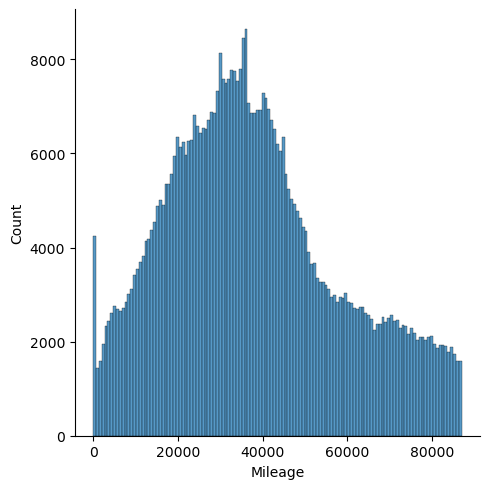

In [76]:
# the graph shows that the Mileage column
# is quite balanced now
sns.displot(df, x="Mileage")

In [77]:
# removing outliers
df = df.query("City < City.quantile(0.70)")

# experimented with different quantile
#df = df.query("City < City.quantile(0.75)")
#df = df.query("City < City.quantile(0.80)")
#df = df.query("City < City.quantile(0.85)")
#df = df.query("City < City.quantile(0.90)")

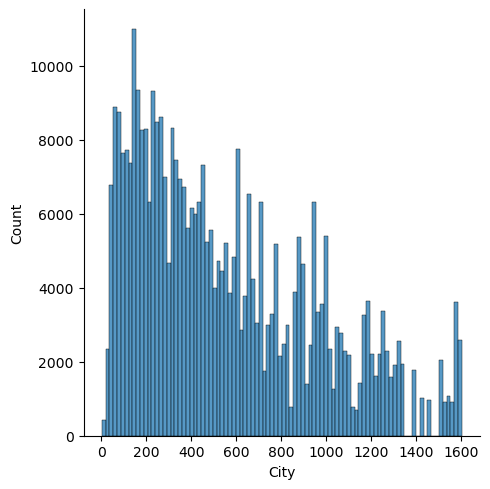

In [78]:
# even though it is not prefeclty balanced
# it has less outliers anyway
sns.displot(df, x="City")

In [79]:
# removing outliers
df = df.query("State < State.quantile(0.85)")

#df = df.query("State < State.quantile(0.95)")

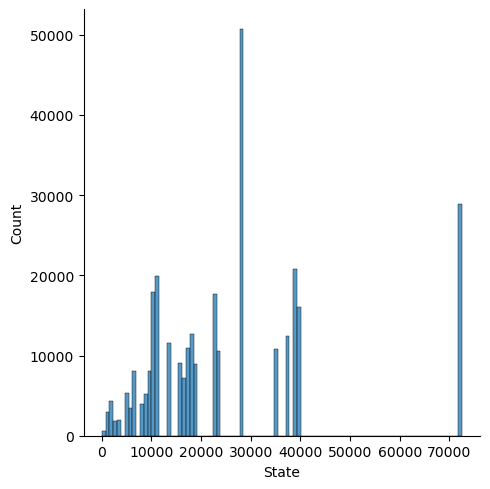

In [80]:
# now there is no extreme outliers 
sns.displot(df, x="State")

In [81]:
# removing outliers
df = df.query("Make < Make.quantile(0.80)")

#df = df.query("Make < Make.quantile(0.85)")
#df = df.query("Make < Make.quantile(0.90)")

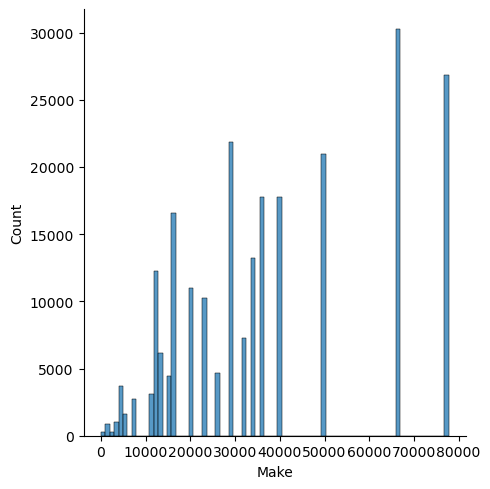

In [82]:
# now there is no extreme outliers 
sns.displot(df, x="Make")

In [83]:
# removing outliers
df = df.query("Model < Model.quantile(0.90)")

#df = df.query("Model < Model.quantile(0.95)")

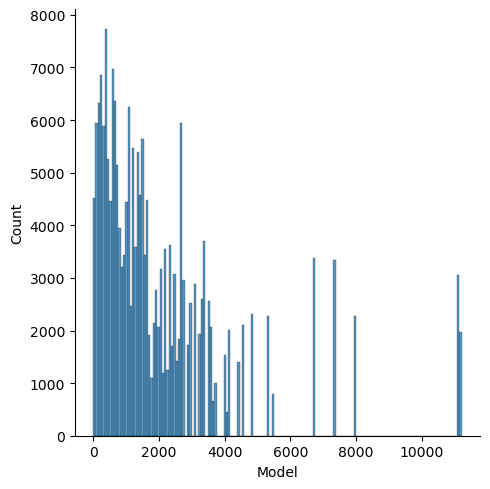

In [84]:
# now there is no extreme outliers 
sns.displot(df, x="Model")

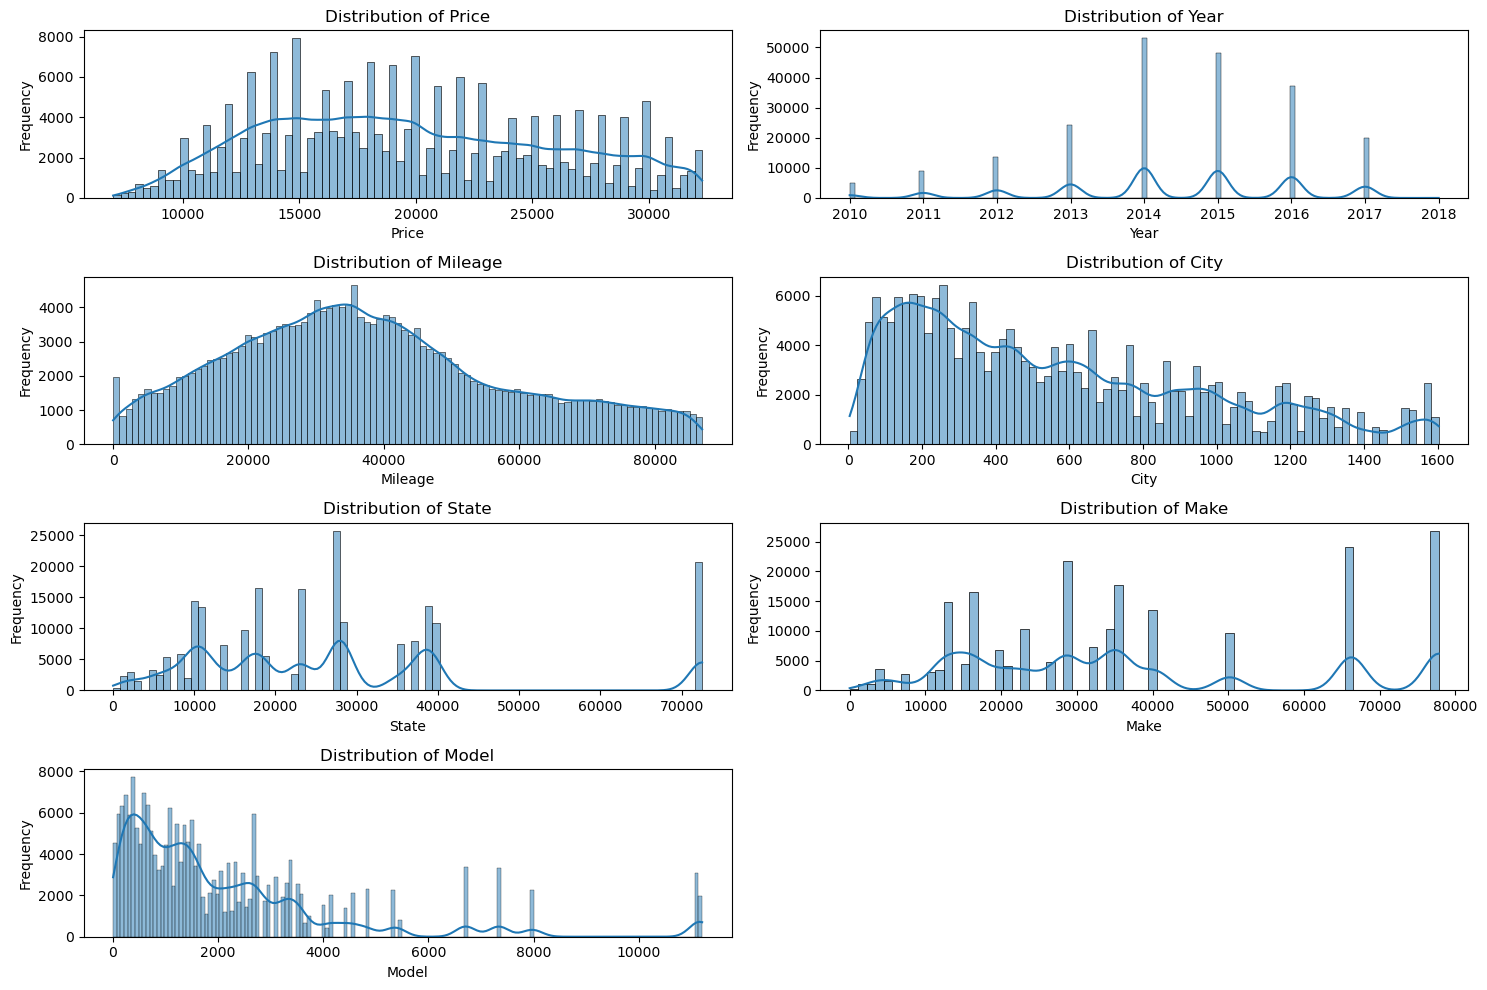

In [85]:
# let's use the same graphs to see balance now

# list of columns to plot
columns_to_plot = ['Price', 'Year', 'Mileage', 'City', 'State', 'Make', 'Model']

# Set up the plotting environment
plt.figure(figsize=(15, 10))

# Loop through the columns and create a displot for each
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)  # Adjust the subplot grid based on the number of columns
    sns.histplot(df[column], kde=True)  # kde=True adds a Kernel Density Estimate
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# insights:
# still some columns need some improvements

In [86]:
# I am curious to see how much data I lost
# by removing outliers
# before any modification I had 852122 values
df.describe()

# I have lost approximately 75.35% of values
# BUT! (there is a big but! :) 
# I purposely chose this dataset to avoid worrying 
# about the number of rows. Of course, in real life, 
# I wouldn’t be able to drop 75%, but now I have a balanced 
# and clean dataset for developing a neural network

,Price,Year,Mileage,City,State,Make,Model
count,210073.000000,210073.000000,210073.000000,210073.000000,210073.000000,210073.000000,210073.000000
mean,19667.230206,2014.405350,37997.292951,561.669058,26628.105711,37162.561105,2086.003294
std,6078.264445,1.662773,20523.279916,404.081973,18528.785749,22608.291275,2203.209227
min,6997.000000,2010.000000,5.000000,4.000000,25.000000,11.000000,1.000000
25%,14895.000000,2014.000000,22917.000000,227.000000,11255.000000,16428.000000,620.000000
50%,18995.000000,2015.000000,35726.000000,460.000000,23149.000000,32415.000000,1401.000000
75%,24445.000000,2016.000000,50555.000000,834.000000,37529.000000,50193.000000,2694.000000
max,32294.000000,2018.000000,86992.000000,1603.000000,72527.000000,77786.000000,11208.000000


In [87]:
# P.s. Saving the dataset for other experiments
# save the df to a new CSV file
df.to_csv('balanced_data.csv', index=False)

# Part 3. X/y variables

In [88]:
df.head()

,Price,Year,Mileage,City,State,Make,Model
3,10999,2014,39922,425,23002,11049,660
4,14799,2016,22142,478,10418,11049,187
6,14490,2014,34032,65,27932,11049,55
7,13995,2013,32384,82,10418,11049,159
8,10495,2013,57596,485,10906,11049,19


In [89]:
# printing out the column names for easier copying for X/y
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Make', 'Model'], dtype='object')

In [90]:
# leave out the target variable! (dependent variable)
X = df[['Year', 'Mileage', 'City', 'State', 'Make', 'Model']]

# have only the target variable here (dependent variable)
y = df['Price']

# Part 4. Inspect the variables if we could remove any of them to improve performance

In [91]:
# correlations are a good starting point
# but they often hide connections (because they only measure
# linear connections)
# for example here, it's implied that Mileage doesn't
# correlate with amount paid.... doesn't make sense, does it?
correlations = df.corr()
correlations

,Price,Year,Mileage,City,State,Make,Model
Price,1.000000,0.237520,-0.276440,-0.007811,-0.049990,-0.095061,0.065675
Year,0.237520,1.000000,-0.643900,0.025363,-0.006634,0.042439,-0.038620
Mileage,-0.276440,-0.643900,1.000000,-0.009839,-0.017586,-0.006208,0.049364
City,-0.007811,0.025363,-0.009839,1.000000,0.043767,-0.000209,0.006207
State,-0.049990,-0.006634,-0.017586,0.043767,1.000000,-0.003246,0.006441
Make,-0.095061,0.042439,-0.006208,-0.000209,-0.003246,1.000000,0.049466
Model,0.065675,-0.038620,0.049364,0.006207,0.006441,0.049466,1.000000


In [92]:
# Tools for deciding important variables: SelectKBest -score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

# insights:
# Mileage plays a pivotal role and
# it goes without saying
# the same as Make
# but there is an interesting insight regarding to State
# it is important because different market demand and supply
# also, states impose different taxes
# we also need to bear in mind various weather and geography conditions

# for some reasons, it shows that the "Year" column has zero impact
# but the correlation table above shows absolutely different info

,Features,Score
1,Mileage,463391177.94
4,Make,369134720.29
3,State,354720939.37
5,Model,55447977.99
2,City,7130247.03
0,Year,58.58


# Part 4 Train/test –split + validation

In [93]:
# first, train/test split => 70% for training, 30% for other purposes (temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# now, split the 30% for other purposes by 50% (resulting in 2 x 15%)
# so finally, we have:
# 70% for training
# 15% for testing
# 15% for validation
# => 70 + 15 +15 = 100%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [94]:
# just seeing how much data we have in each
print(f"Train data amount: {len(X_train)}")
print(f"Test data amount: {len(X_test)}")
print(f"Validation data amount: {len(X_val)}")

Train data amount: 147051
Test data amount: 31511
Validation data amount: 31511


# Part 5. Creating a neural network structure
Almost all layers are Dense-layers and with an output layer of one node

In [95]:
# save this info to a variable so we don't have to change this after
# changing the dataset
variable_amount = len(X.columns)

# needed imports for ModelCheckpoint etc. callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# for EarlyStop/ReduceLROnPlateau, see materials and Moodle
# for examples on how to use and when to use (usually more useful with classification)

# create a model checkpoint to a file, and only save the best one
mc = ModelCheckpoint('best_model_regression1.keras', monitor='val_loss', mode='min', save_best_only=True)

# combine all active callbacks into a list
# have only those you need, for example only ModelCheckpoint
callback_list = [mc]

# Define Sequential neural network model
# modify the input shape to match your training column count
# remember, one of the columns is removed from training columns
# to be the target value. so if your data originally had 10 columns
# the input shape is 9 ... (10 - 1 => 9)
# the input layer itself can have a different number of nodes
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function

# three most common alternatives for the regularizer
# kernel_regularizer=keras.regularizers.l1(l1=0.1)
# kernel_regularizer=keras.regularizers.l2(l2=0.1)
# kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.1)

# typically you can use normalization + regularizer for your model
# also try to alter the complexity and size of the neural network
# it can greatly affect the performance
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dropout(0.1),
        layers.Dense(8, activation="relu"),
        layers.Dense(1)
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

/Users/emiliiazemskova/anaconda3/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 6)              │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 269 (1.05 KB)

 Non-trainable params: 12 (48.00 B)

# Part 6. Fiting data to the neural network model

In [96]:
model.fit(x=X_train, y=y_train, epochs=800, validation_data=(X_val, y_val), callbacks=callback_list)

Epoch 1/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 399us/step - loss: 244665296.0000 - val_loss: 33315848.0000
Epoch 2/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 385us/step - loss: 36299564.0000 - val_loss: 33020536.0000
Epoch 3/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 388us/step - loss: 36248112.0000 - val_loss: 33178528.0000
Epoch 4/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 386us/step - loss: 36143108.0000 - val_loss: 32992556.0000
Epoch 5/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 385us/step - loss: 36203876.0000 - val_loss: 32987074.0000
Epoch 6/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 380us/step - loss: 36123556.0000 - val_loss: 32985030.0000
Epoch 7/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 373us/step - loss: 35944416.0000 - val_loss: 33004338.0000
Epoch 8/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 377us/step - loss: 36056916.0000 - val_loss: 32974870.0000
Epoch 9/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 374us/step - loss: 36198296.0000 - val_loss: 32998616.0000
Epoch 10/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 380us/s

# Part 6. Training metrics

<Axes: >

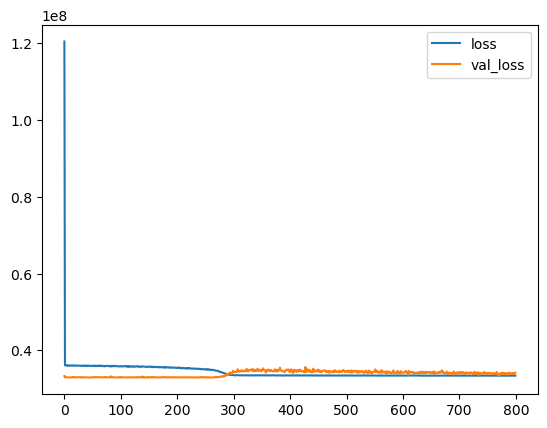

In [97]:
# training and validation loss over epochs 
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

# The training loss quickly drops after first epochs 
# --> the model is learning

# after around 280 epochs there is 
# a bit of overfitiing
# it means I chose too many epochs

# they overlapping --> should be good results

In [98]:
# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

# the model is often good when these error values are similar
# mine are almost similar

Test data evaluation:
34666752.0

Train data evaluation:
34318508.0


# Part 7.  Make some test predictions to see what kind of mistakes the model makes

In [99]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

# insights:
# we can see that results of predictions
# are lower than true values

985/985 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step


,Test True Y,Model Predictions
0,24875,18415.79
1,25989,18733.52
2,17500,18847.43
3,18350,19838.96
4,20989,16665.37
...,...,...
31506,14000,16540.96
31507,17290,20265.85
31508,19950,18288.07
31509,15500,19932.47


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

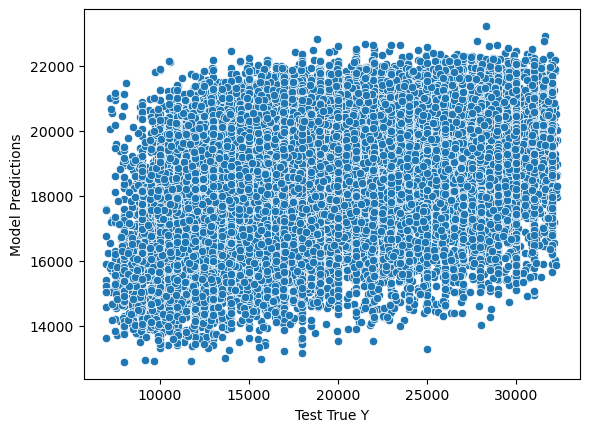

In [100]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

# oh my gosh!! :)
# surprise!

# maybe becuase I do not have a clear linear regression here

# Part 7. The inspection of error metrics 

In [101]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))


# MAE
# Lower is better
# on average, the model’s predictions are off by about $4713.47
# if we talk about prices that are about 150,000
# it is not a huge difference

# MSE
# Lower is better
# probably, because of outliers we still have some MSE 

# RMSE
# Lower is better
# the model’s predictions are off by about $5683.16.

# R-squared
# Closer to 1 is better
# it is only 14% but it is not minus as it could be :)

# Explained variance score
# Closer to 1 is better
# A  low score (0.14) further suggests that 
# the model’s predictions are not closely aligned 
# with the actual data

# To sum up,
# it could be worse but there is a room for improvements
# probably, there is a problem with the model
# I will test in other notebooks

MAE
4841.92 $

MSE
34666769.92 $^2

RMSE:
5887.85 $

R-squared:
0.07

Explained variance score:
0.1


/var/folders/lj/tcwl5glj0blfftjn4df0129r0000gn/T/ipykernel_36925/220905741.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


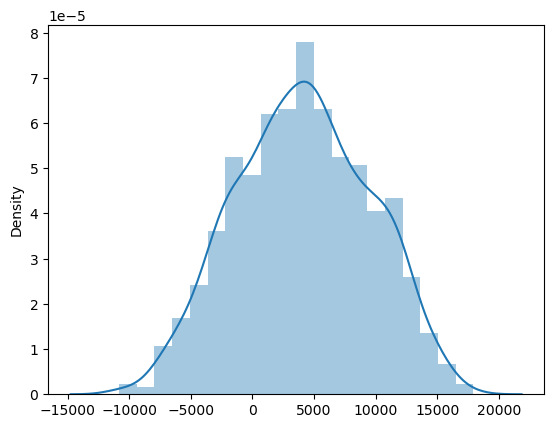

In [102]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

# here we have a perfect predictions graph

# Part 7. Trying the model with some imaginary new values

In [103]:
X.columns

Index(['Year', 'Mileage', 'City', 'State', 'Make', 'Model'], dtype='object')

In [104]:
df.head()

,Price,Year,Mileage,City,State,Make,Model
3,10999,2014,39922,425,23002,11049,660
4,14799,2016,22142,478,10418,11049,187
6,14490,2014,34032,65,27932,11049,55
7,13995,2013,32384,82,10418,11049,159
8,10495,2013,57596,485,10906,11049,19


In [105]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
    'Year': 2016,
    'Mileage': 22140, 
    'City': 3, 
    'State': 2,
    'Make': 11049, 
    'Model': 660,
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [106]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated price for this house:")
print(f"{round(float(result[0]), 2)} $")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Estimated price for this house:
20931.56 $
----------------
